# Slope Fields

Most differential equations cannot be solved analytically in terms of elementary functions. So what do we do? We can *always* approximate! A slope field is a visualization of the slopes of solutions of a first order differential equation. We can study the slope field of an equation to approximate quantitative properties and describe qualitative properties of solutions.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## What is a Slope Field?

Let $y' = f(t,y)$ be a first order differential equation. The function $f(t,y)$ gives us complete information about the slope of any solution of the equation. In particular, the number $f(t,y)$ at point $(t,y)$ is the slope at $t$ of the unique solution $y(t)$ which passes through the point $(t,y)$. Therefore if we plot a short line of slope $f(t,y)$ at a bunch of points in the $ty$-plane then the resulting figure should show roughly what solutions look like.

Consider a first order differential equation $y' = f(t,y)$. We can represent the function $f(t,y)$ as a Python function. For example, consider the equation $y' = -ty$. The code below defines a Python function `f`.

In [2]:
f = lambda t,y: -t*y

The keyword `lambda` starts the function definition. The symbols `t,y` set the input variables as `t` and `y`, the colon `:` begins the function formula `-t*y` where `*` is multiplication. Plug in some values for `t` and `y` to verify. For example, $f(1.2,-0.2) = -(1.2)(-0.2) = 0.24$.

In [3]:
f(1.2,-0.2)

0.24

Now the goal is to use the Python function `f` to compute slopes at a grid of points in the $ty$-plane and plot the slope field.

## `slopefield`

Define a function called `slopefield` which takes input parameters `f`, `tinterval`, `yinterval`, `tstep` and `ystep` where:

* `f` is a Python function which represents the right hand side of a first order differential equation $y' = f(t,y)$
* `tinterval` is a Python list of length 2 which represents the interval $[t_0,t_1]$ of the grid in the slope field
* `yinterval` is a Python list of length 2 which represents the interval $[y_0,y_1]$ of the grid in the slope field
* `tstep` is the step size between points in the $t$ direction
* `ystep` is the step size between points in the $y$ direction

The function accomplishes the following tasks:

* Create the vector `t` of values from $t_0$ to $t_1$ with step size `tstep`
* Create the vector `y` of values from $y_0$ to $y_1$ with step size `ystep`
* Define a length $L$ for the lines in the slope field (small enough not to overlap)
* For each $t_i$ and $y_j$ in the grid, compute $m_{ij} = f(t_i,y_j)$ and plot a line of slope $m_{ij}$ and length $L$

In [4]:
def slopefield(f,tinterval,yinterval,tstep,ystep):
    t = np.arange(tinterval[0],tinterval[1],tstep)
    y = np.arange(yinterval[0],yinterval[1],ystep)
    L = 0.7*min(tstep,ystep)
    for i in range(len(t)):
        for j in range(len(y)):
            slope = f(t[i],y[j])
            theta = np.arctan(slope)
            dy = L*np.sin(theta)
            dt = L*np.cos(theta)
            plt.plot([t[i],t[i] + dt],[y[j],y[j] + dy],'b')

For example, let's plot the slope field for the equaiton $y' = t - y^2$ over the intervals $0 \leq t \leq 3$ and $-1 \leq y \leq 2$ with step size 0.2 in both directions.

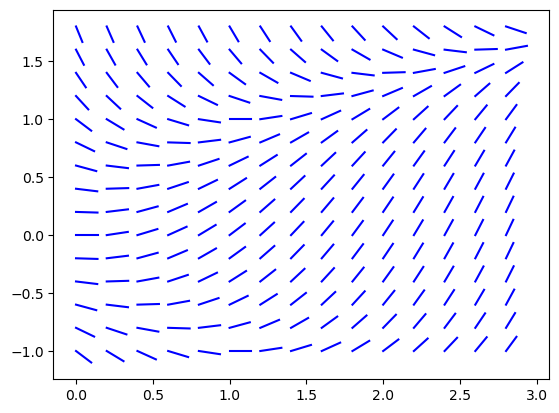

In [5]:
f = lambda t,y: t - y**2
slopefield(f,[0,3],[-1,2],0.2,0.2)

Now let's plot the slope field of $y' = -ty$ over the intervals intervals $0 \leq t \leq 5$ and $-1 \leq y \leq 1$ with step size 0.25 in the $t$ direction and step size 0.1 in the $y$ direction.

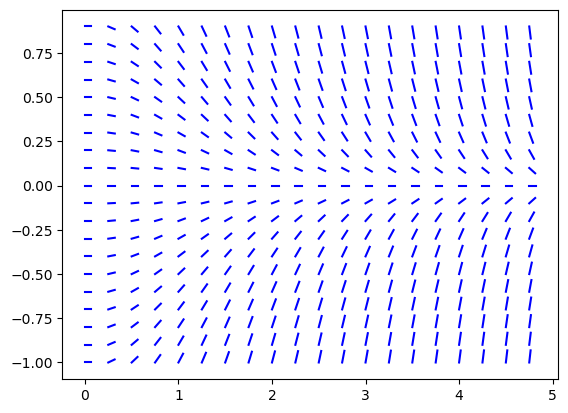

In [6]:
f = lambda t,y: -t*y
slopefield(f,[0,5],[-1,1],0.25,0.1)

## Examples

### Autonomous Equation

Plot the slope field of $y' = 1 - y^2$.

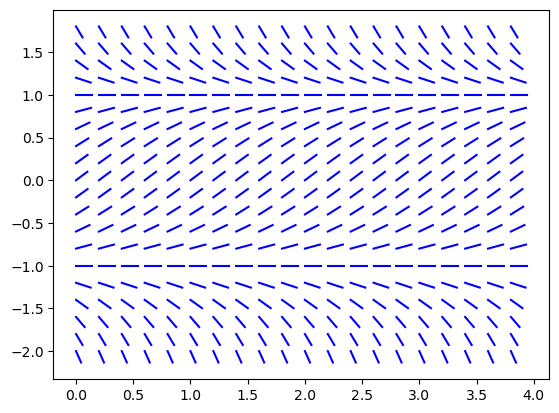

In [7]:
f = lambda t,y: 1 - y**2
slopefield(f,[0,4],[-2,2],0.2,0.2)

The equation is autonomous since the right hand function $f(t,y) = 1-y^2$ does not depend on $t$. We can also see this in the slope field: the slopes are constant in the $t$ direction. The slope field also shows that $y = 1$ is a stable equilibirum solution and $y=-1$ is an unstable equilibrium solution.

### Convergent Solutions

Plot the slope field of $\displaystyle y' = -\frac{y}{2 + \cos(t)}$.

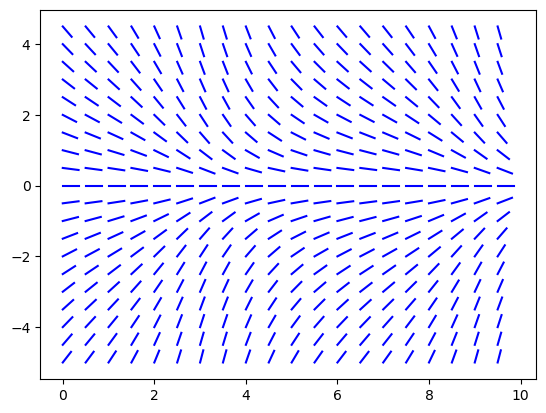

In [8]:
f = lambda t,y: -y/(2 + np.cos(t))
slopefield(f,[0,10],[-5,5],0.5,0.5)

The figure suggests that $y(t) \to 0$ as $t \to \infty$ for any solution but we need some more analysis to *prove* this.